<font size =5 color='#2B3956'>Benmahammed Islem 3261314 - TP FDMS <br/><br/>
Descente de Gradient et la Régularisation L1
</font>
<br/>
<br/>
<br/>

###Quelques nouvelles fonctions utiles

In [14]:
import math
def dot(v,w) : # produit scalaire pour listes  
    return sum(v_i * w_i for v_i , w_i in zip(v,w))

def vector_subtract(v,w): # différence entre listes
    return [v_i - w_i
            for v_i,w_i in zip(v,w)]

def vector_add(v,w): # différence entre listes
    return [v_i + w_i
            for v_i,w_i in zip(v,w)]

def scalar_multiply(s,v): # scalaire * vecteur
    return [v_i*s
            for v_i in v]

def sum_of_squares(v) : # somme des carrés 
    return sum(v_i ** 2 for v_i in v)

def sumVec(v) : # somme d'une liste
    return sum(v_i for v_i in v)

def in_random_order(data) : # trier les données d'une façon aléatoire
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes : 
        yield data[i]

# 1) Classe principale :
   
   Cette classe "ModeleGD" hérite de BaseEstimator et ClassifierMixin .  
   La fonction de régularisation est définie dans fit() qui effectue l'apprentissage ,elle prend en paramètre les   données (x), leurs étiquettes (y), le pas de la descente (epsilon), le nombre d'itération (maxI) ainsi qu'un terme lamdba . elle permet d'avoir à la fin un vecteur de poids theta optimisé par un algorithme de descente de gradient et selon la régularisation définie précedemment . 
   
   La fonction predict permet de prédir une étiquette pour chaque élément d'un jeu de données selon l'apprentissage effectué. Elle prend en paramètre les données à tester ainsi que le vecteur de poids issu de la fonction. 

In [50]:
import numpy as np
import random
from sklearn.base import BaseEstimator,ClassifierMixin

class ModeleGD(BaseEstimator,ClassifierMixin):

            
    def __init__(self):
        random.seed(0)
        self.epsilon = 00.1
        self.lambdaa = 0
        self.maxI = 20
        self.theta = [random.random(),random.random(),random.random(),random.random()]
   
    def fit(self,target_fn,gradient_fn,x,y) : 
        data = zip(x,y)
        theta=self.theta
        epsilon =self.epsilon
        lambdaa = self.lambdaa
        min_theta , min_value = None,float("inf")
        iterations_with_no_improvement = 0 
        while iterations_with_no_improvement < self.maxI :
            
            value = sum(target_fn(x_i,y_i,self.lambdaa,theta) for x_i,y_i in data)
            if value < min_value:
                min_theta , min_value = theta,value
                iterations_with_no_improvement = 0 
                epsilon = self.epsilon
            else :
                iterations_with_no_improvement += 1
                epsilon *= 0.9
            
            for x_i , y_i in in_random_order(data) :
                gradient_i = gradient_fn(x_i,y_i,self.lambdaa,theta)
                new_theta = theta - epsilon*gradient_i
                for k in range(len(theta)):
                    if(new_theta[k]*theta[k])<0:
                        theta[k]=0
                    else:
                        theta[k]=new_theta[k]
        self.theta = min_theta
        
    def L1_function(self,xi,yi,lambdaa,theta):
        return (yi-dot(xi,theta)**2 + lambdaa * abs(sumVec(theta)))
    
    def L1_gradient(self,xi,yi,lambdaa,theta):
        return (scalar_multiply(2*dot(xi,theta)-yi,xi) + lambdaa*np.sign(theta))/xi.shape[0]
    
    def L2_function(self,xi,yi,lambdaa,theta):
        return (yi-dot(theta,xi))**2 + lambdaa * abs(sumVec(theta))
    
    def L2_gradient(self,xi,yi,lambdaa,theta):
        return (scalar_multiply(2*(dot(theta,xi)-yi),xi) + lambdaa*np.sign(theta))/xi.shape[0]
    
    def L1L2_function(self,xi,yi,lambdaa,theta):
        return (yi-dot(theta,xi))**2 + lambdaa*abs(sumVec(theta))
    
    def L1L2_gradient(self,xi,yi,lambdaa,theta):
        return (2 * (dot(theta,xi)-yi) * xi + lambdaa*np.sign(theta))/xi.shape[0]
        
    def setParams(self,eps,lambd,maxIt):
        self.epsilon = eps
        self.lambdaa = lambd
        self.maxI = maxIt

    def predict (self,X):
        return np.sign(X.dot(self.theta))

    def score(self,pred,y):
        a=0
        for i in range(pred.shape[0]):
            if(pred[i]==y[i]):
                a+=1
        return 1.0*a/pred.shape[0]

# Tests : 

On génére un ensemble de données étiquetées avec sklearn. On divise ensuite cet ensemble en deux pour avoir un jeu d'apprentissage et un de test.

In [23]:
import numpy as np
from sklearn import cross_validation
from sklearn.datasets import make_classification
from sklearn import cross_validation
x,y=make_classification(n_samples=1000, n_features=4)
y=np.where(y>0,1,-1)
x_train, x_test, y_train, y_test = cross_validation.train_test_split( x, y, test_size=0.5, random_state=0)


### Modele L1 == > Evaluation du score par rapport au nombre d'iterations pour lambda = 0 et epsilon = 0.1 ou epsilon = 0.001 

In [24]:
model=ModeleGD() 
# lambdaa = 0 & epsilon = 0.1 
score1=[]
for i in range(1,100,5):
    model.setParams(0.1,0,i)
    loss1=model.fit(model.L1_function,model.L1_gradient,x_train,y_train)
    pred1=model.predict(x_test)
    score1.append(model.score(pred1,y_test))

# lambdaa = 0 & epsilon = 0.01
score2=[]    
for i in range(1,100,5):
    model.setParams(0.001,0,i)
    loss2=model.fit(model.L1_function,model.L1_gradient,x_train,y_train)
    pred2=model.predict(x_test)
    score2.append(model.score(pred2,y_test))


##Visualisation des résultats : 

[0.85, 0.848, 0.844, 0.85, 0.848, 0.852, 0.852, 0.85, 0.854, 0.852, 0.85, 0.85, 0.852, 0.85, 0.85, 0.852, 0.85, 0.85, 0.85, 0.85]
[0.854, 0.85, 0.852, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.852, 0.85, 0.85, 0.85, 0.852, 0.85, 0.85, 0.852, 0.85, 0.85, 0.85]


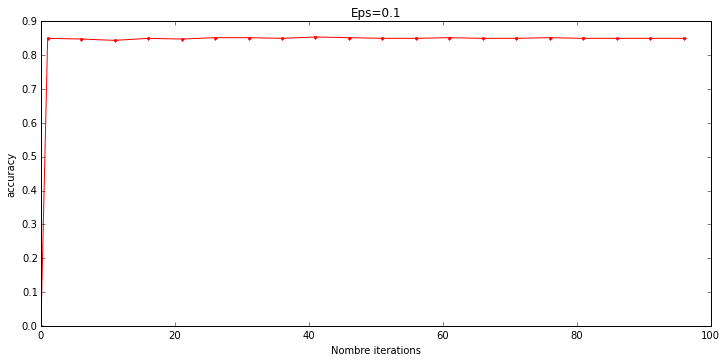

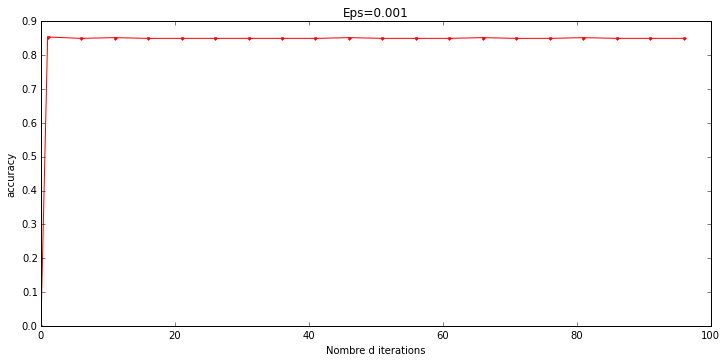

In [26]:
%matplotlib inline
print score1
print score2
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
plt.plot([0]+range(1,100,5), [0]+score1, 'r.-')
plt.xlabel('Nombre iterations')
plt.ylabel('accuracy')
plt.title('Eps=0.1')
plt.show()

fig = plt.figure(figsize=(12,12))
plt.subplot(2, 1, 2)
plt.plot([0]+range(1,100,5), [0]+score2, 'r.-')
plt.xlabel('Nombre d iterations')
plt.ylabel('accuracy')
plt.title('Eps=0.001')
plt.show()

In [ ]:
### Evaluation du score par rapport à lambda avec un nombre d'itération fixe=100 

In [43]:
scoreL=[]
for i in range(0,25):
    model.setParams(0.01,i,20)
    loss=model.fit(model.L1_function,model.L1_gradient,x_train,y_train)
    pred=model.predict(x_test)
    scoreL.append(model.score(pred,y_test))
print scoreL



[0.852, 0.812, 0.16, 0.83, 0.83, 0.566, 0.81, 0.81, 0.81, 0.81, 0.81, 0.81, 0.81, 0.19, 0.81, 0.81, 0.81, 0.19, 0.81, 0.81, 0.19, 0.81, 0.81, 0.19, 0.19]


25


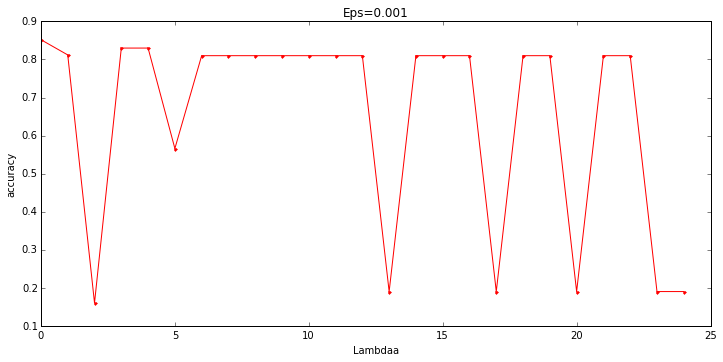

In [44]:
print len(scoreL)
fig = plt.figure(figsize=(12,12))
plt.subplot(2, 1, 2)
plt.plot(range(0,25),scoreL, 'r.-')
plt.xlabel('Lambdaa')
plt.ylabel('accuracy')
plt.title('Eps=0.001')
plt.show()

Meilleur valeur de lambdaa = 0 

### Modele L2 == > Evaluation du score par rapport au nombre d'iterations pour lambda = 0 et epsilon = 0.1 ou epsilon = 0.001 

In [51]:
model=ModeleGD() 
# lambdaa = 0 & epsilon = 0.1 
score1=[]
for i in range(1,100,5):
    model.setParams(0.1,0,i)
    loss1=model.fit(model.L2_function,model.L2_gradient,x_train,y_train)
    pred1=model.predict(x_test)
    score1.append(model.score(pred1,y_test))

# lambdaa = 0 & epsilon = 0.01
score2=[]    
for i in range(1,100,5):
    model.setParams(0.001,0,i)
    loss2=model.fit(model.L2_function,model.L2_gradient,x_train,y_train)
    pred2=model.predict(x_test)
    score2.append(model.score(pred2,y_test))

[0.854, 0.852, 0.862, 0.85, 0.856, 0.854, 0.854, 0.852, 0.852, 0.852, 0.852, 0.85, 0.85, 0.852, 0.85, 0.85, 0.85, 0.85, 0.852, 0.85]
[0.858, 0.852, 0.85, 0.85, 0.85, 0.85, 0.85, 0.852, 0.852, 0.852, 0.85, 0.85, 0.852, 0.85, 0.852, 0.85, 0.852, 0.85, 0.85, 0.852]


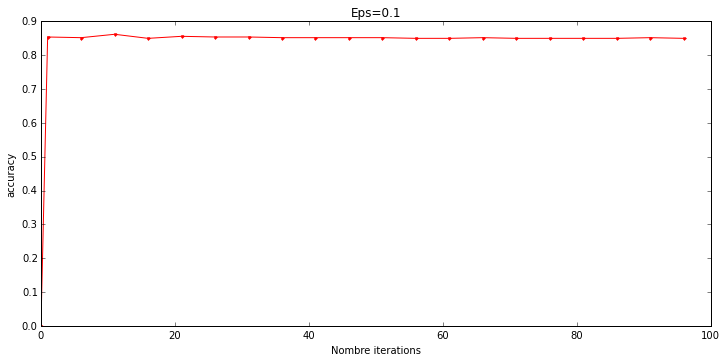

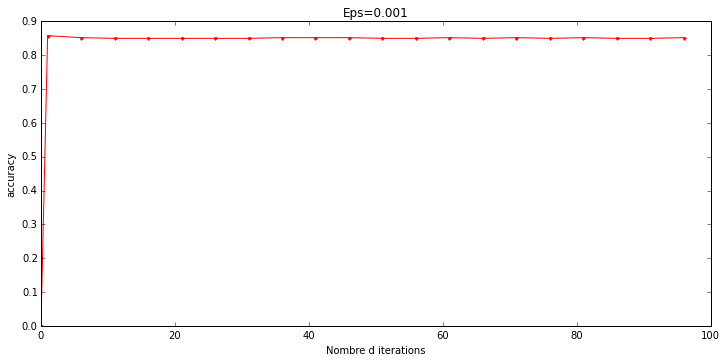

In [52]:
%matplotlib inline
print score1
print score2
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
plt.plot([0]+range(1,100,5), [0]+score1, 'r.-')
plt.xlabel('Nombre iterations')
plt.ylabel('accuracy')
plt.title('Eps=0.1')
plt.show()

fig = plt.figure(figsize=(12,12))
plt.subplot(2, 1, 2)
plt.plot([0]+range(1,100,5), [0]+score2, 'r.-')
plt.xlabel('Nombre d iterations')
plt.ylabel('accuracy')
plt.title('Eps=0.001')
plt.show()